In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)

bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기:',bostonDF.shape)
bostonDF.head()
print(bostonDF)

Boston 데이타셋 크기: (506, 14)
        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  

In [9]:
bostonDF.info()
bostonDF.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


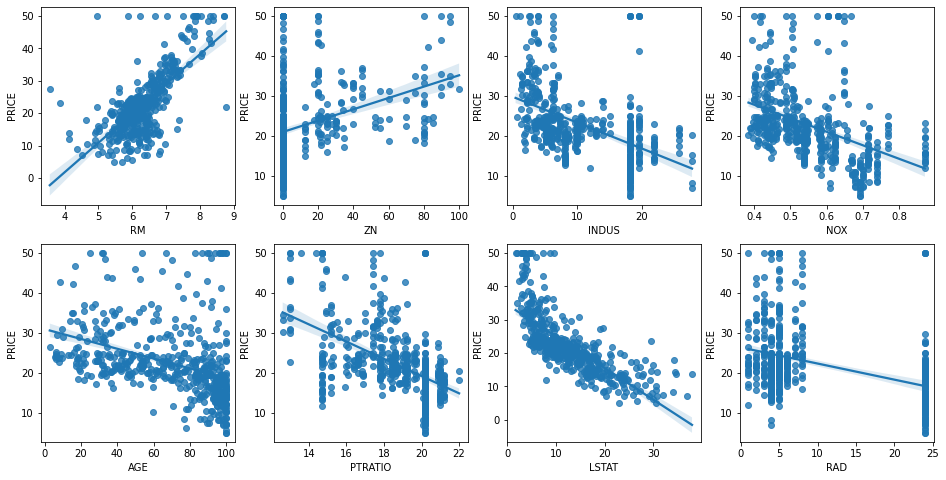

In [18]:
fig, axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col = i%4
    sns.regplot(x=feature, y='PRICE',data=bostonDF, ax=axs[row][col])

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_data , y_target,test_size=0.3,random_state=156)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE:{0:.3f}, RMSE:{1:.3F}'.format(mse,rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))



MSE:17.297, RMSE:4.159
Variance score : 0.757


In [22]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164315
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [23]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [27]:
from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
lr=LinearRegression()

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5 fold의 개별 Negative MSE scores: ', np.round(neg_mse_scores,2))
print('5 fold의 개별 RMSE scores: ', np.round(rmse_scores,2))
print('5 fold의 평균 RMSE:{0:.3f}'.format(avg_rmse))

5 fold의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
5 fold의 개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
5 fold의 평균 RMSE:5.829


### 규제 
- 과적합을 개선하는 방식 
- 비용함수에 알파값으로 패널티를 부여해서 회계 계수 값의 크기를 감소 

1. 릿지 /  L2 = W값을 어느정도 상쇄시켜서 감소시켜 적용 회귀계수값을 더 작게 만드는 회귀모델
2. 라쏘 / L1 = W값을 아예 삭제해버림 피처 값을 0으로 
3. 엘라스틱넷 / L2+L1 = 주로 피처가 많은 데이터 세트에 적용

In [3]:
from sklearn.linear_model import Ridge



ridge = Ridge(alpha =10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error, cv=5")
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 fold의 개별 Negative MSE score:', np.round(neg_mse_scores,3 ))
print(' 5 fold의 개별 RMSE score:',np.round(rmse_scores,3))
print(' 5 fold의 평균 RMSE: {0:.3f}'.format(avg_rmse))

NameError: name 'cross_val_score' is not defined

In [30]:
alphas = [0,0.1,1,10,100]

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print('alpha {0} 일때 5fold의 평균 RMSE:{1:.3f}'.format(alpha, avg_rmse))

alpha 0 일때 5fold의 평균 RMSE:5.829
alpha 0.1 일때 5fold의 평균 RMSE:5.788
alpha 1 일때 5fold의 평균 RMSE:5.653
alpha 10 일때 5fold의 평균 RMSE:5.518
alpha 100 일때 5fold의 평균 RMSE:5.330


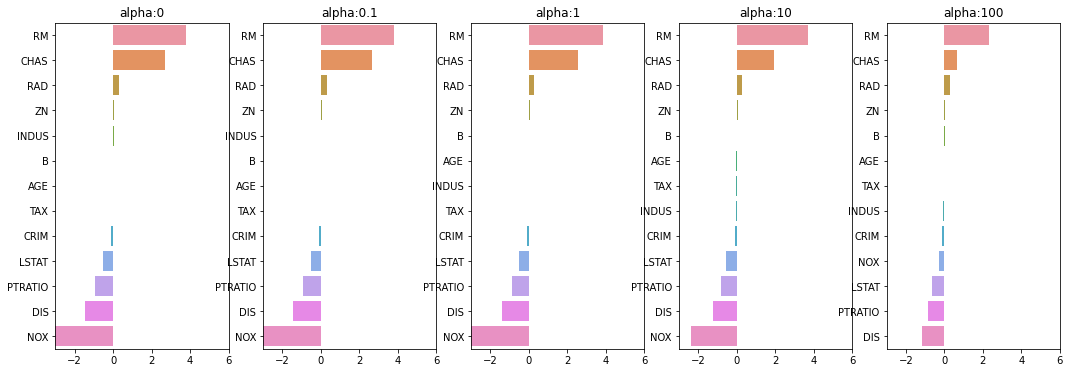

In [31]:
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge =Ridge(alpha =alpha)
    ridge.fit(X_data, y_target)
    
    coeff = pd.Series(data = ridge.coef_ , index=X_data.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname]=coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])
    
plt.show()

In [32]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [43]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None,
                       verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('######',model_name, '######')
    for param in params:
        if model_name =='Ridge':model = Ridge(alpha=param)
        elif model_name =='Lasso':model =Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores=cross_val_score(model, X_data_n,
                                      y_target_n, scoring="neg_mean_squared_error",cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0}일 때 5폴드 세트의 평균 RMSE: {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_,index=X_data_n.columns)
            colname='alpha'+str(param)
            coeff_df[colname] = coeff
            
    return coeff_df
    


In [51]:
lasso_alphas=[1 , 0.1 , 0.5 , 1 , 3]
coeff_lasso_df = get_linear_reg_eval('Lasso',params=lasso_alphas,X_data_n=X_data, y_target_n=y_target)


###### Lasso ######
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.615
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.669
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.776
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.189


In [52]:
print(lasso_alphas)

[1, 0.1, 0.5, 1, 3]


In [56]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

KeyError: 'alpha:1'

In [49]:
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                          X_data_n=X_data, y_target_n=y_target)


###### ElasticNet ######
alpha 0.07일 때 5폴드 세트의 평균 RMSE: 5.542
alpha 0.1일 때 5폴드 세트의 평균 RMSE: 5.526
alpha 0.5일 때 5폴드 세트의 평균 RMSE: 5.467
alpha 1일 때 5폴드 세트의 평균 RMSE: 5.597
alpha 3일 때 5폴드 세트의 평균 RMSE: 6.068


In [50]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

KeyError: 'alpha:0.07'

In [5]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import fbprophet 
import matplotlib.pyplot as plt 
import pandas as pd

df = pd.read_csv('./data/avocado.csv')
df.read()

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [4]:
df.groupby('type').mean()


,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
type,,,,,,,,,,,
conventional,24.236686,1.158040,1.653213e+06,578611.649925,574805.318859,45405.796798,454390.130901,346721.795885,101457.698855,6210.635065,2016.147929
organic,24.227776,1.653999,4.781121e+04,7311.281600,15411.857724,266.254582,24817.654696,17613.474543,7202.982659,1.197164,2016.147868


In [13]:
df=df.loc[(df.type == 'conventional') & (df.region =='TotalUS')]
df['Date']=pd.to_datetime(df['Date'])
data = df[['Data','AveragePrice']].reset_index(drop=True)
data=data.rename(columns={'Date':'ds','AveragePrice':'y'})
data.head()


C:\ProgramData\Anaconda3\envs\myenv1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KeyError: "['Data'] not in index"

In [14]:
data.plot(x='ds',y='y',figsize =(16,8))


NameError: name 'data' is not defined

In [15]:
model=Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
forecast.tail()

NameError: name 'data' is not defined

In [16]:
fig1 = model.plot(forecast)
fig2 = model.plot_components(forecast)
fig2 = model.plot_components(forecast)

NameError: name 'forecast' is not defined